# Kaggle Competition Titanic data set.
## Checking the data set
## Filling the null value with appropriate values
## Dropping unnacessary columns
## Converting catogerical data into numerical data
## Building the logestic regression model and fitting the data
## Feature selection with ML

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
titanic = sns.load_dataset('titanic')

# Head of data set

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Information of data set, It shows all the required information of data.

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


## It describe the data set, in the below table we can see mean, median, min and max value of all the numerical features.

In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## It shows the missing value in data set.

In [7]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
missing_data = (titanic.isnull().sum()/ len(titanic)) *100
missing_data.sort_values(ascending = False)

deck           77.216611
age            19.865320
embark_town     0.224467
embarked        0.224467
alone           0.000000
alive           0.000000
adult_male      0.000000
who             0.000000
class           0.000000
fare            0.000000
parch           0.000000
sibsp           0.000000
sex             0.000000
pclass          0.000000
survived        0.000000
dtype: float64

## It gives all the missing value in percentage, like we can see deck has more than 77% of missing value.

In [9]:
missing_data[missing_data> 0].sort_values(ascending= False)

deck           77.216611
age            19.865320
embark_town     0.224467
embarked        0.224467
dtype: float64

## We can see same missing value in heatmap. Deck has most missing value.

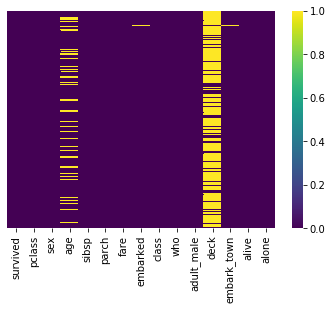

In [10]:
sns.heatmap(titanic.isnull(), yticklabels = False, cmap = 'viridis')

## Hist below shows the age of the passenger who were board in titanic.

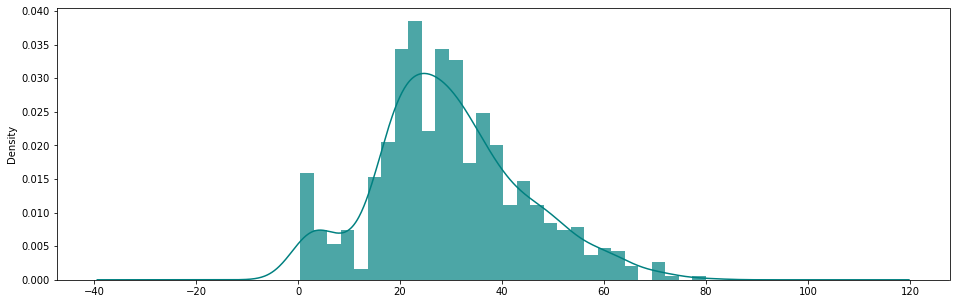

In [11]:
ax = titanic['age'].hist(bins = 30, density = True, stacked = True, color = 'teal', alpha = 0.7, figsize = (16, 5))
titanic['age'].plot(kind = 'density', color = 'teal')
ax.set_label('Age')
plt.show()


## Distplot below shows male and female passanger who are survived and not survived in titanic crash.

Text(0.5, 1.0, 'Male')

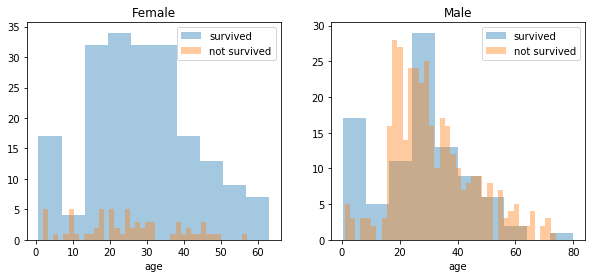

In [13]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows =1, ncols= 2, figsize= (10,4))
women = titanic[titanic['sex']== 'female']
men = titanic[titanic['sex']== 'male']

ax = sns.distplot(women[women[survived]== 1].age.dropna(), bins = 10, label = survived, ax = axes[0], kde = False)
ax = sns.distplot(women[women[survived]== 0].age.dropna(), bins = 40, label = not_survived, ax = axes[0], kde = False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men[survived]== 1].age.dropna(), bins = 10, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men[survived]== 0].age.dropna(), bins = 40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

In [14]:
titanic['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [15]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

## Below catplot shows average age of people who were in different class. Like in first class passanger are bit older than other two class.

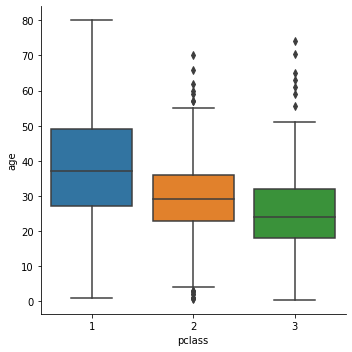

In [16]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'box')

## Below catplot shows the fare of different class, like first class people has paid more fare than other two class.

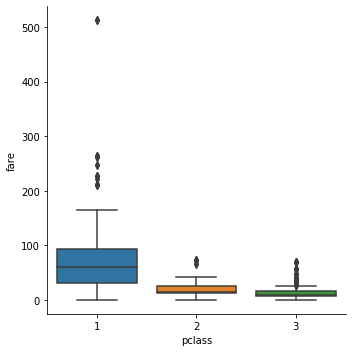

In [17]:
sns.catplot(x = 'pclass', y= 'fare', data = titanic, kind = 'box')

In [18]:
titanic[titanic['pclass']== 1]['age'].mean()

38.233440860215055

In [20]:
titanic[titanic['pclass']== 2]['age'].mean()

29.87763005780347

In [21]:
titanic[titanic['pclass']== 3]['age'].mean()

25.14061971830986

In [22]:
def input_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return titanic[titanic['pclass']== 1]['age'].mean()
        elif pclass == 2:
            return titanic[titanic['pclass']== 2]['age'].mean()
        elif pclass == 3:
            return titanic[titanic['pclass']== 3]['age'].mean()
    else:
        return age

## Filling missing age with mean value with their relative classes.

In [23]:
titanic['age']= titanic[['age', 'pclass']].apply(input_age, axis = 1)

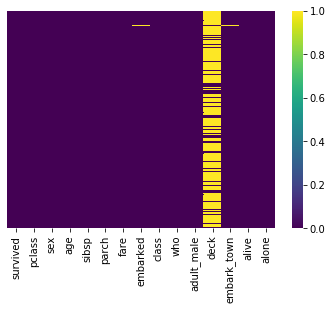

In [25]:
sns.heatmap(titanic.isnull(), yticklabels = False, cmap = 'viridis')

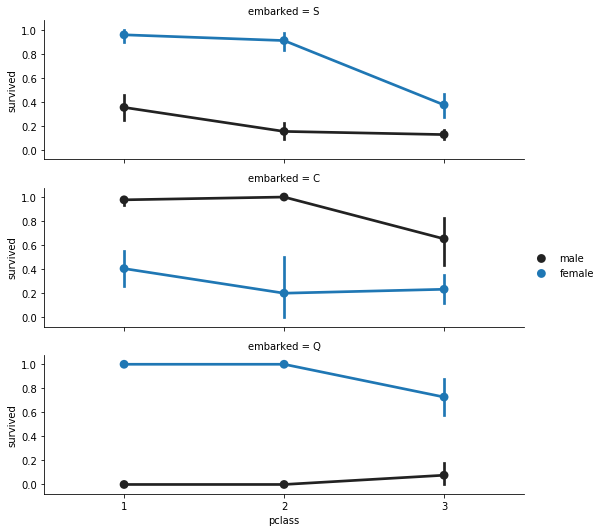

In [26]:
# analysing embarked
f = sns.FacetGrid(titanic, row = 'embarked', height = 2.5, aspect= 3)
f.map(sns.pointplot, 'pclass', 'survived', 'sex', order = None, hue_order = None)
f.add_legend()


In [27]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [35]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace= True)

In [36]:
titanic['embarked'].isnull().sum()

0

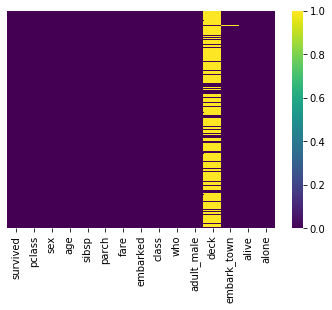

In [37]:
sns.heatmap(titanic.isnull(), yticklabels = False, cmap = 'viridis')

## Dropping all unnecessary columns

In [38]:
titanic.drop(labels= ['deck', 'embark_town', 'alive'], inplace = True, axis= 1)

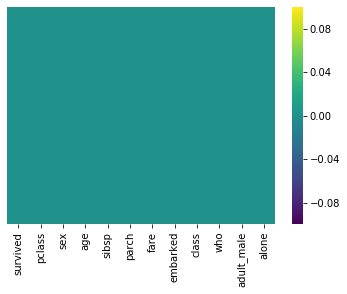

In [39]:
sns.heatmap(titanic.isnull(), yticklabels = False, cmap = 'viridis')

In [40]:
titanic['fare'] = titanic['fare'].astype('int')
titanic['age'] = titanic['age'].astype('int')
titanic['pclass'] = titanic['pclass'].astype('int')

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
survived      891 non-null int64
pclass        891 non-null int32
sex           891 non-null object
age           891 non-null int32
sibsp         891 non-null int64
parch         891 non-null int64
fare          891 non-null int32
embarked      891 non-null object
class         891 non-null category
who           891 non-null object
adult_male    891 non-null bool
alone         891 non-null bool
dtypes: bool(2), category(1), int32(3), int64(3), object(3)
memory usage: 55.0+ KB


## Converting all the categorical features into numerical features

In [41]:
# converting categorical data into numerical data
genders = { 'male': 0, 'female': 1}
titanic['sex'] =  titanic['sex'].map(genders)

In [42]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,S,Third,man,True,False
1,1,1,1,38,1,0,71,C,First,woman,False,False
2,1,3,1,26,0,0,7,S,Third,woman,False,True
3,1,1,1,35,1,0,53,S,First,woman,False,False
4,0,3,0,35,0,0,8,S,Third,man,True,True


In [43]:
who = {'man': 0, 'woman': 1, 'child': 2}
titanic['who'] = titanic['who'].map(who)

In [44]:
adult_male = {True: 1, False: 0}
titanic['adult_male']= titanic['adult_male'].map(adult_male)

In [45]:
alone = {True: 1, False: 0}
titanic['alone']= titanic['alone'].map(alone)

In [46]:
ports = {'S': 0, 'C': 1, 'Q':2}
titanic['embarked']= titanic['embarked'].map(ports)

In [47]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,0,Third,0,1,0
1,1,1,1,38,1,0,71,1,First,1,0,0
2,1,3,1,26,0,0,7,0,Third,1,0,1
3,1,1,1,35,1,0,53,0,First,1,0,0
4,0,3,0,35,0,0,8,0,Third,0,1,1


In [48]:
titanic.drop(labels = ['class', 'who'], axis = 1, inplace = True)

In [49]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1
3,1,1,1,35,1,0,53,0,0,0
4,0,3,0,35,0,0,8,0,1,1


## Building logistic regression model

In [50]:
# Bulding logistic regression model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [51]:
X = titanic.drop('survived', axis = 1)
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [52]:
X_train.shape

(596, 9)

In [53]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [54]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [55]:
model.score(X_test, y_test)

0.8271186440677966

## Now doing feature selection with the help of machine learning algorithm.

In [58]:
from sklearn.feature_selection import RFE

In [61]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 500)
rfe = RFE(model, 5, verbose= 1)
rfe = rfe.fit(X, y)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


## Here it has selected five features out of nine features

In [62]:
rfe.support_

array([ True, False, False,  True,  True, False, False,  True,  True])

In [63]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1
3,1,1,1,35,1,0,53,0,0,0
4,0,3,0,35,0,0,8,0,1,1


In [64]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,3,0,22,1,0,7,0,1,0
1,1,1,38,1,0,71,1,0,0
2,3,1,26,0,0,7,0,0,1
3,1,1,35,1,0,53,0,0,0
4,3,0,35,0,0,8,0,1,1


In [67]:
XX = X[X.columns[rfe.support_]]
XX.head()

,pclass,sibsp,parch,adult_male,alone
0,3,1,0,1,0
1,1,1,0,0,0
2,3,0,0,0,1
3,1,1,0,0,0
4,3,0,0,1,1


In [76]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.2, random_state = 8, stratify = y)

In [77]:
X_train.shape

(712, 5)

In [78]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## After feature selection our accuracy has been improved by 3%.

In [79]:
model.score(X_test, y_test)

0.8547486033519553

In [80]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, auc, log_loss

In [81]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [82]:
y_pred_prob = model.predict_proba(X_test)[: , 1]

In [83]:
[fpr, tpr, thr]= roc_curve(y_test, y_pred_prob)

In [86]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Log Loss: ', log_loss(y_test, y_pred_prob))
print('auc: ', auc(fpr, tpr))

Accuracy:  0.8547486033519553
Log Loss:  0.3659737372713988
auc:  0.9007246376811595


In [87]:
idx = np.min(np.where(tpr> 0.95))
idx

27

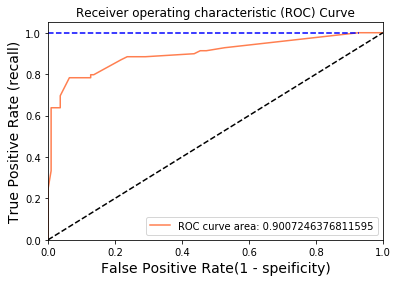

In [91]:
plt.figure()
plt.plot(fpr, tpr, color= 'coral', label = 'ROC curve area: ' + str(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color = 'blue')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate(1 - speificity)', fontsize = 14)
plt.ylabel('True Positive Rate (recall)', fontsize = 14)
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.show()